# **Task 5**

Per la valvola solenoide identificata come guasta, prevedere il rapporto di apertura (0% ≤ rapporto di apertura < 100%).

## **1. Importazione e preprocessing dei dati**

Importazione del dataset etichettato

In [2]:
import os
import pandas as pd

path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "train_data_aggregated_split.pkl")
df_train_aggregated= pd.read_pickle(file_path)

df_train_aggregated.head(5)

,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,...,P7_time_line_integral,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID
0,1,Normal,100,100,100,100,No,No,No,No,...,784.906580,0.017144,5.013518,5020.028779,65.000000,26930.154869,501.116403,11.633031,1,1
1,1,Normal,100,100,100,100,No,No,No,No,...,787.373792,-0.002641,5.016796,5610.686996,65.000000,26048.487157,508.501184,11.441019,1,2
2,1,Normal,100,100,100,100,No,No,No,No,...,789.525599,-0.003006,5.017115,5325.708422,64.837905,26122.284330,501.853078,11.428535,1,3
3,1,Normal,100,100,100,100,No,No,No,No,...,785.214600,-0.002262,4.994830,5071.356039,65.000000,27028.792007,505.424186,11.654316,2,1
4,1,Normal,100,100,100,100,No,No,No,No,...,787.175441,-0.003732,4.999298,5609.065086,65.000000,26860.719421,520.657365,11.618024,2,2


Filtriamo solo le righe dove `Condition` è uguale ad Fault

In [3]:
df_fault = df_train_aggregated[df_train_aggregated["Condition"] == "Fault"]

Rimuoviamo le colonne non utili

In [4]:
columns=["Condition", "Spacecraft", "BP1", "BP2", "BP3", "BP4", "BP5", "BP6", "BP7", "BV1"]
df_fault = df_fault.drop(columns=columns)
df_fault.head(10)

,SV1,SV2,SV3,SV4,P1_time_mean,P1_time_median,P1_time_p25,P1_time_p75,P1_time_variance,P1_time_line_integral,...,P7_time_line_integral,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID
315,0,100,100,100,1.990987,1.965806,1.928698,2.062674,0.063283,794.372086,...,787.443747,0.078116,5.022674,3435.995059,65.000000,21376.410718,374.586686,10.364321,106,1
316,0,100,100,100,1.991161,1.960991,1.928880,2.062837,0.063853,794.423918,...,788.450749,-0.000695,5.024541,3604.771208,65.000000,20678.566891,371.613295,10.193743,106,2
317,0,100,100,100,1.991315,1.961103,1.929212,2.062337,0.063707,796.482167,...,790.664881,-0.000892,5.024811,3375.005753,64.837905,20697.085020,371.103696,10.172779,106,3
318,25,100,100,100,1.984399,1.959150,1.892100,2.062495,0.094906,791.732325,...,785.129491,0.016613,5.131036,4874.267686,65.000000,26956.236895,494.105584,11.638663,107,1
319,25,100,100,100,1.984909,1.957863,1.893444,2.062784,0.095468,791.913697,...,787.337991,-0.002065,5.133735,5417.301463,65.000000,25812.616693,495.252441,11.389102,107,2
320,25,100,100,100,1.985138,1.958316,1.893502,2.062783,0.095253,793.994670,...,789.568374,-0.002196,5.134264,5155.496473,64.837905,25861.005634,489.644458,11.371237,107,3
321,50,100,100,100,1.984351,1.961723,1.891558,2.062679,0.094895,791.712980,...,785.008032,-0.001186,5.058240,4813.061142,65.000000,27203.232782,491.878077,11.691863,108,1
322,50,100,100,100,1.984997,1.957863,1.894173,2.063048,0.095325,791.947922,...,786.385660,-0.001819,5.060748,5224.693647,65.000000,26033.651981,486.340632,11.437761,108,2
323,50,100,100,100,1.985227,1.958311,1.894571,2.062896,0.095110,794.028907,...,788.832466,-0.002278,5.061238,5012.725871,64.837905,25995.150981,481.464664,11.400691,108,3
324,75,100,100,100,1.984365,1.960820,1.891337,2.060440,0.094843,791.718275,...,785.043980,0.026341,5.026410,4991.457941,65.000000,27018.162965,499.964902,11.652024,109,1


Creiamo 4 dataframe distinti (ognuno per ogni tipo di guasto)

In [5]:
# 1. Creazione delle colonne fault_position e valve_opening
def find_fault_position(row):
    # Restituisce 1..4 a seconda di quale colonna SVi è diversa da 100
    for i, col in enumerate(["SV1", "SV2", "SV3", "SV4"], start=1):
        if row[col] != 100:
            return i
    return None  # Se nessuna colonna è diversa da 100, ma dovrebbe esserci sempre una valvola aperta

def find_valve_opening(row):
    # Restituisce il valore diverso da 100 trovato in SV1..SV4
    for col in ["SV1", "SV2", "SV3", "SV4"]:
        if row[col] != 100:
            return row[col]
    return 100  # Se per qualche motivo nessuna colonna è diversa da 100

# Applica le funzioni a df_fault
df_fault = df_fault.copy()  # Evita SettingWithCopyWarning
df_fault["fault_location"] = df_fault.apply(find_fault_position, axis=1)
df_fault["valve_opening"] = df_fault.apply(find_valve_opening, axis=1)

# 2. Creazione dei 4 DataFrame separati
df_fault_sv1 = df_fault[df_fault["fault_location"] == 1].copy()
df_fault_sv2 = df_fault[df_fault["fault_location"] == 2].copy()
df_fault_sv3 = df_fault[df_fault["fault_location"] == 3].copy()
df_fault_sv4 = df_fault[df_fault["fault_location"] == 4].copy()

# Visualizza le dimensioni per conferma
print("df_fault_sv1:", df_fault_sv1.shape)
print("df_fault_sv2:", df_fault_sv2.shape)
print("df_fault_sv3:", df_fault_sv3.shape)
print("df_fault_sv4:", df_fault_sv4.shape)

df_fault_sv1: (36, 99)
df_fault_sv2: (36, 99)
df_fault_sv3: (36, 99)
df_fault_sv4: (36, 99)


## **2. Addestramento dei 4 regressori (uno per ogni tipo di Fault)**

### **2.1 Regressore Fault SV1**

Definisco X (le feature) e y (il target)

In [6]:
X = df_fault_sv1.drop(columns=["SV1", "SV2", "SV3", "SV4", "fault_location", "valve_opening", "Case", "Window_ID"])
y = df_fault_sv1['valve_opening']

Applico SelectKBest con f_regression per selezionare le migliori n feature

Le top 2 feature per la regressione (SV1) sono:
['P3_time_mean', 'P3_time_line_integral']


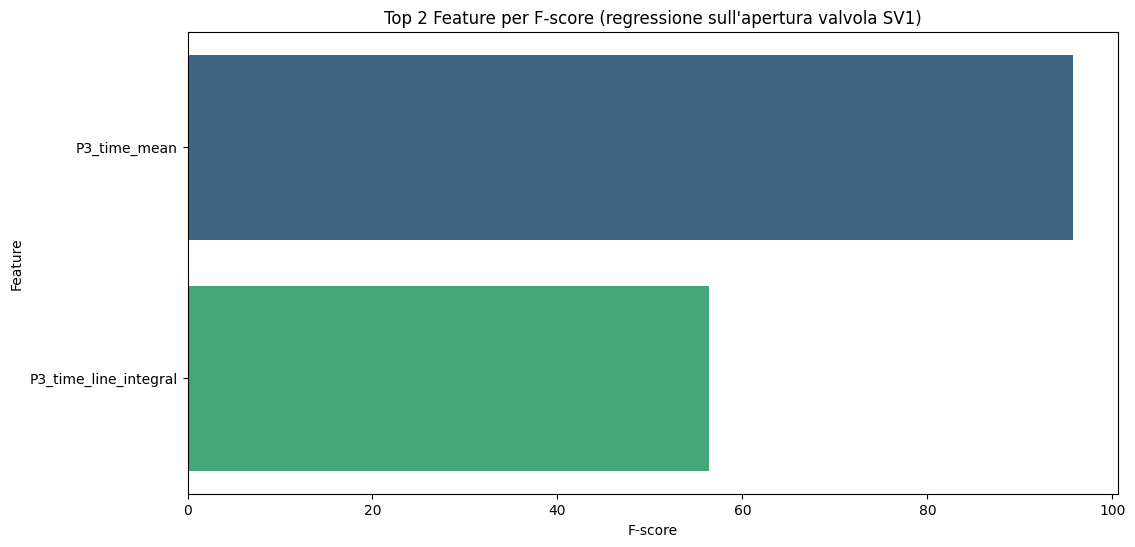

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

n = 2  # top n feature
selector = SelectKBest(score_func=f_regression, k=n)
X_selected = selector.fit_transform(X, y)

# Ottieni i nomi delle feature selezionate
selected_features_sv1 = X.columns[selector.get_support()]
print("Le top {} feature per la regressione (SV1) sono:".format(n))
print(selected_features_sv1.tolist())

# 3. Visualizza i punteggi F delle top n feature in un istogramma
# Creiamo una Series con gli F-score per tutte le feature
f_scores = pd.Series(selector.scores_, index=X.columns)
# Estraiamo i punteggi solo per le feature selezionate e li ordiniamo in ordine decrescente
topn_f_scores = f_scores[selected_features_sv1].sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=topn_f_scores.values, y=topn_f_scores.index, hue=topn_f_scores.index, palette='viridis', dodge=False)
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.title("Top {} Feature per F-score (regressione sull'apertura valvola SV1)".format(n))
plt.show()

Addestro l'XGBoost, l'Extra Trees e il Random Forest Regressor per poi metterli a confronto 

--- XGBoost Regressor_SV1 ---
MAE: 7.607863590907073
MSE: 169.42252026917183
RMSE: 13.016240635036363
R^2 Score: 0.8173803570993348

--- ExtraTrees Regressor_SV1 ---
MAE: 5.796875
MSE: 90.990234375
RMSE: 9.538880142605839
R^2 Score: 0.9019221052631579

--- RandomForest Regressor_SV1 ---
MAE: 6.84375
MSE: 107.6796875
RMSE: 10.376882359360156
R^2 Score: 0.8839326315789474



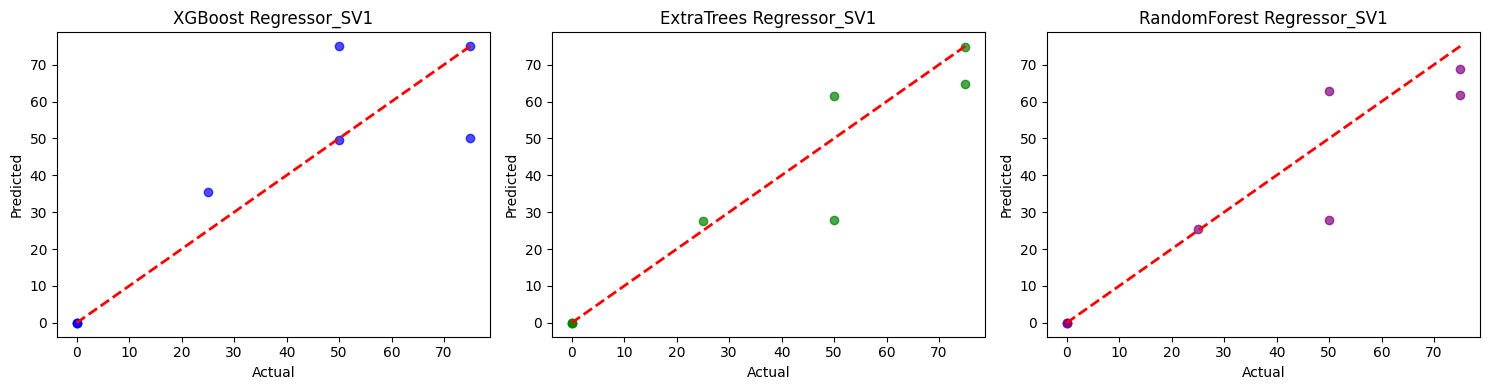

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preparazione del dataset ---
X = df_fault_sv1[selected_features_sv1]

# Suddivisione in training (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. Gradient Boosting (XGBoost) ---
import xgboost as xgb
xgb_reg_sv1 = xgb.XGBRegressor(random_state=42)
xgb_reg_sv1.fit(X_train, y_train)
y_pred_xgb = xgb_reg_sv1.predict(X_test)

# --- 2. ExtraTreesRegressor ---
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
et_reg_sv1 = ExtraTreesRegressor(random_state=42)
et_reg_sv1.fit(X_train, y_train)
y_pred_et = et_reg_sv1.predict(X_test)

# --- 3. RandomForestRegressor (al posto dell'SVR) ---
rf_reg_sv1 = RandomForestRegressor(random_state=42)
rf_reg_sv1.fit(X_train, y_train)
y_pred_rf = rf_reg_sv1.predict(X_test)

# --- Funzione per stampare le metriche di regressione ---
def print_regression_metrics(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R^2 Score:", r2)
    print("")

print_regression_metrics(y_test, y_pred_xgb, "XGBoost Regressor_SV1")
print_regression_metrics(y_test, y_pred_et, "ExtraTrees Regressor_SV1")
print_regression_metrics(y_test, y_pred_rf, "RandomForest Regressor_SV1")

# --- Visualizzazione dei risultati ---
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("XGBoost Regressor_SV1")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_et, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("ExtraTrees Regressor_SV1")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("RandomForest Regressor_SV1")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

### **2.2 Regressore Fault SV2**

Definisco X (le feature) e y (il target)

In [9]:
X = df_fault_sv2.drop(columns=["SV1", "SV2", "SV3", "SV4", "fault_location", "valve_opening", "Case", "Window_ID"])
y = df_fault_sv2['valve_opening']

Applico SelectKBest con f_regression per selezionare le migliori n feature

Le top 20 feature per la regressione (SV2) sono:
['P1_time_p25', 'P1_time_variance', 'P1_time_min', 'P1_time_max', 'P1_freq_sum_power_spectrum', 'P1_freq_rms_freq', 'P2_time_mean', 'P2_time_p25', 'P2_time_variance', 'P2_freq_sum_power_spectrum', 'P2_freq_rms_freq', 'P4_time_median', 'P4_time_variance', 'P4_freq_sum_power_spectrum', 'P4_freq_std_power_spectrum', 'P4_freq_rms_freq', 'P5_time_mean', 'P5_time_p25', 'P6_time_p25', 'P6_freq_std_power_spectrum']


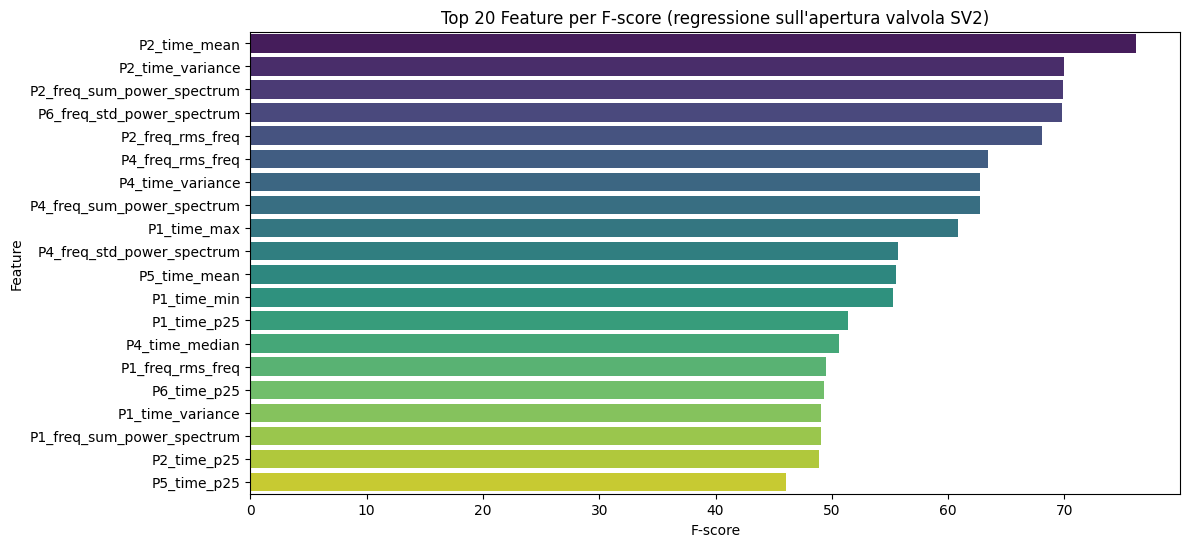

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

n = 20  # top n feature
selector = SelectKBest(score_func=f_regression, k=n)
X_selected = selector.fit_transform(X, y)

# Ottieni i nomi delle feature selezionate
selected_features_sv2 = X.columns[selector.get_support()]
print("Le top {} feature per la regressione (SV2) sono:".format(n))
print(selected_features_sv2.tolist())

# 3. Visualizza i punteggi F delle top n feature in un istogramma
# Creiamo una Series con gli F-score per tutte le feature
f_scores = pd.Series(selector.scores_, index=X.columns)
# Estraiamo i punteggi solo per le feature selezionate e li ordiniamo in ordine decrescente
topn_f_scores = f_scores[selected_features_sv2].sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=topn_f_scores.values, y=topn_f_scores.index, hue=topn_f_scores.index, palette='viridis', dodge=False)
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.title("Top {} Feature per F-score (regressione sull'apertura valvola SV2)".format(n))
plt.show()

Addestro l'XGBoost, l'Extra Trees e il Random Forest Regressor per poi metterli a confronto 

--- XGBoost Regressor_SV2 ---
MAE: 5.05510142975254
MSE: 62.77579507161961
RMSE: 7.9231177620694
R^2 Score: 0.9404792461543162

--- ExtraTrees Regressor_SV2 ---
MAE: 1.5
MSE: 4.78125
RMSE: 2.1866069605669876
R^2 Score: 0.9954666666666667

--- RandomForest Regressor_SV2 ---
MAE: 4.4375
MSE: 42.828125
RMSE: 6.544320056354212
R^2 Score: 0.9593925925925926



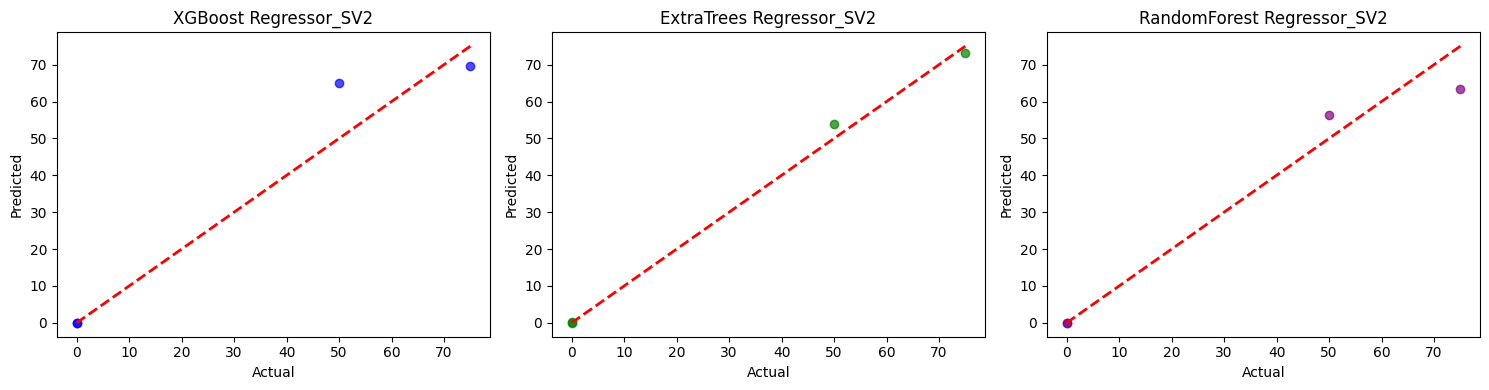

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preparazione del dataset ---
X = df_fault_sv2[selected_features_sv2]

# Suddivisione in training (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# --- 1. Gradient Boosting (XGBoost) ---
import xgboost as xgb
xgb_reg_sv2 = xgb.XGBRegressor(random_state=42)
xgb_reg_sv2.fit(X_train, y_train)
y_pred_xgb = xgb_reg_sv2.predict(X_test)

# --- 2. ExtraTreesRegressor ---
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
et_reg_sv2 = ExtraTreesRegressor(random_state=42)
et_reg_sv2.fit(X_train, y_train)
y_pred_et = et_reg_sv2.predict(X_test)

# --- 3. RandomForestRegressor (al posto dell'SVR) ---
rf_reg_sv2 = RandomForestRegressor(random_state=42)
rf_reg_sv2.fit(X_train, y_train)
y_pred_rf = rf_reg_sv2.predict(X_test)

# --- Funzione per stampare le metriche di regressione ---
def print_regression_metrics(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R^2 Score:", r2)
    print("")

print_regression_metrics(y_test, y_pred_xgb, "XGBoost Regressor_SV2")
print_regression_metrics(y_test, y_pred_et, "ExtraTrees Regressor_SV2")
print_regression_metrics(y_test, y_pred_rf, "RandomForest Regressor_SV2")

# --- Visualizzazione dei risultati ---
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("XGBoost Regressor_SV2")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_et, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("ExtraTrees Regressor_SV2")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("RandomForest Regressor_SV2")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

### **2.3 Regressore Fault SV3**

Definisco X (le feature) e y (il target)

In [12]:
X = df_fault_sv2.drop(columns=["SV1", "SV2", "SV3", "SV4", "fault_location", "valve_opening", "Case", "Window_ID"])
y = df_fault_sv2['valve_opening']

Applico SelectKBest con f_regression per selezionare le migliori n feature

Le top 10 feature per la regressione (SV3) sono:
['P1_time_max', 'P2_time_mean', 'P2_time_variance', 'P2_freq_sum_power_spectrum', 'P2_freq_rms_freq', 'P4_time_variance', 'P4_freq_sum_power_spectrum', 'P4_freq_std_power_spectrum', 'P4_freq_rms_freq', 'P6_freq_std_power_spectrum']


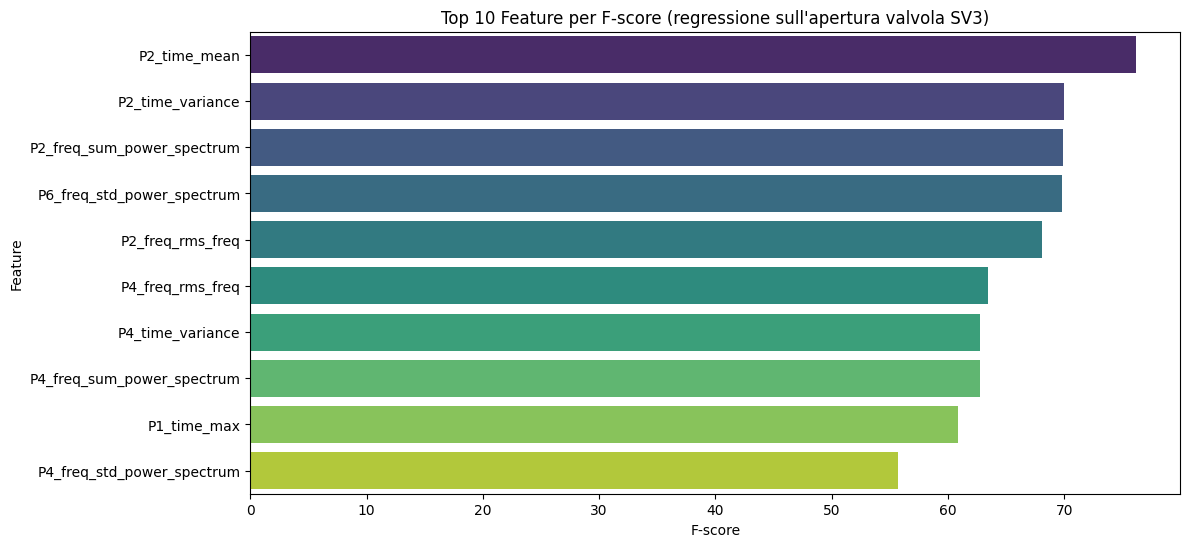

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

n = 10  # top n feature
selector = SelectKBest(score_func=f_regression, k=n)
X_selected = selector.fit_transform(X, y)

# Ottieni i nomi delle feature selezionate
selected_features_sv3 = X.columns[selector.get_support()]
print("Le top {} feature per la regressione (SV3) sono:".format(n))
print(selected_features_sv3.tolist())

# 3. Visualizza i punteggi F delle top n feature in un istogramma
# Creiamo una Series con gli F-score per tutte le feature
f_scores = pd.Series(selector.scores_, index=X.columns)
# Estraiamo i punteggi solo per le feature selezionate e li ordiniamo in ordine decrescente
topn_f_scores = f_scores[selected_features_sv3].sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=topn_f_scores.values, y=topn_f_scores.index, hue=topn_f_scores.index, palette='viridis', dodge=False)
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.title("Top {} Feature per F-score (regressione sull'apertura valvola SV3)".format(n))
plt.show()

Addestro l'XGBoost, l'Extra Trees e il Random Forest Regressor per poi metterli a confronto 

--- XGBoost Regressor_SV3 ---
MAE: 6.2500253192774835
MSE: 156.2442541917303
RMSE: 12.499770165556257
R^2 Score: 0.8518572997293223

--- ExtraTrees Regressor_SV3 ---
MAE: 0.5
MSE: 0.40625
RMSE: 0.6373774391990981
R^2 Score: 0.9996148148148148

--- RandomForest Regressor_SV3 ---
MAE: 1.25
MSE: 1.875
RMSE: 1.3693063937629153
R^2 Score: 0.9982222222222222



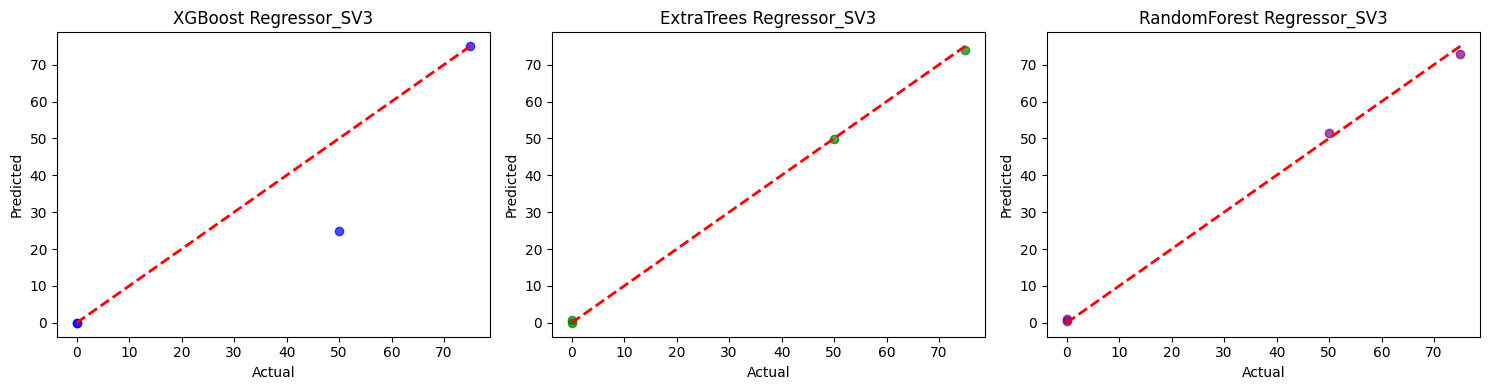

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preparazione del dataset ---
X = df_fault_sv3[selected_features_sv3]

# Suddivisione in training (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# --- 1. Gradient Boosting (XGBoost) ---
import xgboost as xgb
xgb_reg_sv3 = xgb.XGBRegressor(random_state=42)
xgb_reg_sv3.fit(X_train, y_train)
y_pred_xgb = xgb_reg_sv3.predict(X_test)

# --- 2. ExtraTreesRegressor ---
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
et_reg_sv3 = ExtraTreesRegressor(random_state=42)
et_reg_sv3.fit(X_train, y_train)
y_pred_et = et_reg_sv3.predict(X_test)

# --- 3. RandomForestRegressor (al posto dell'SVR) ---
rf_reg_sv3 = RandomForestRegressor(random_state=42)
rf_reg_sv3.fit(X_train, y_train)
y_pred_rf = rf_reg_sv3.predict(X_test)

# --- Funzione per stampare le metriche di regressione ---
def print_regression_metrics(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R^2 Score:", r2)
    print("")

print_regression_metrics(y_test, y_pred_xgb, "XGBoost Regressor_SV3")
print_regression_metrics(y_test, y_pred_et, "ExtraTrees Regressor_SV3")
print_regression_metrics(y_test, y_pred_rf, "RandomForest Regressor_SV3")

# --- Visualizzazione dei risultati ---
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("XGBoost Regressor_SV3")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_et, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("ExtraTrees Regressor_SV3")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("RandomForest Regressor_SV3")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

### **2.4 Regressore Fault SV4**

Definisco X (le feature) e y (il target)

In [15]:
X = df_fault_sv4.drop(columns=["SV1", "SV2", "SV3", "SV4", "fault_location", "valve_opening", "Case", "Window_ID"])
y = df_fault_sv4['valve_opening']

Applico SelectKBest con f_regression per selezionare le migliori n feature

Le top 15 feature per la regressione (SV4) sono:
['P1_time_p25', 'P1_time_min', 'P1_time_max', 'P1_freq_rms_freq', 'P2_time_variance', 'P2_freq_sum_power_spectrum', 'P2_freq_rms_freq', 'P5_time_mean', 'P5_time_p25', 'P5_time_variance', 'P5_time_min', 'P5_freq_sum_power_spectrum', 'P5_freq_rms_freq', 'P7_time_mean', 'P7_time_line_integral']


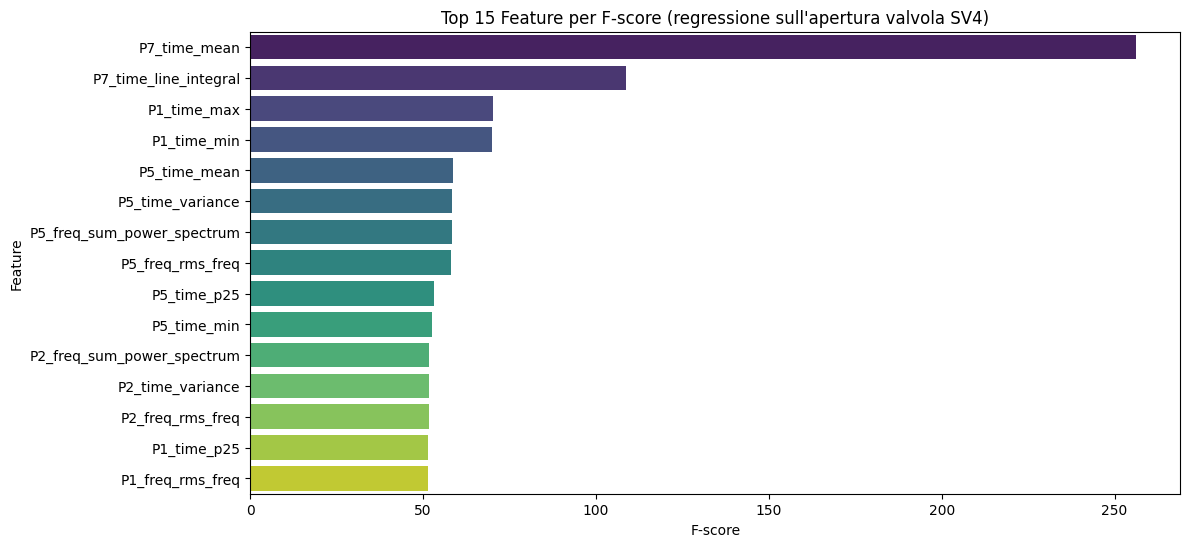

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

n = 15  # top n feature
selector = SelectKBest(score_func=f_regression, k=n)
X_selected = selector.fit_transform(X, y)

# Ottieni i nomi delle feature selezionate
selected_features_sv4 = X.columns[selector.get_support()]
print("Le top {} feature per la regressione (SV4) sono:".format(n))
print(selected_features_sv4.tolist())

# 3. Visualizza i punteggi F delle top n feature in un istogramma
# Creiamo una Series con gli F-score per tutte le feature
f_scores = pd.Series(selector.scores_, index=X.columns)
# Estraiamo i punteggi solo per le feature selezionate e li ordiniamo in ordine decrescente
topn_f_scores = f_scores[selected_features_sv4].sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=topn_f_scores.values, y=topn_f_scores.index, hue=topn_f_scores.index, palette='viridis', dodge=False)
plt.xlabel("F-score")
plt.ylabel("Feature")
plt.title("Top {} Feature per F-score (regressione sull'apertura valvola SV4)".format(n))
plt.show()

Addestro l'XGBoost, l'Extra Trees e il Random Forest Regressor per poi metterli a confronto 

--- XGBoost Regressor_SV4 ---
MAE: 0.00020543658683891408
MSE: 5.445557149393567e-08
RMSE: 0.00023335717579267982
R^2 Score: 0.9999999999413026

--- ExtraTrees Regressor_SV4 ---
MAE: 0.78125
MSE: 1.0078125
RMSE: 1.0038986502630631
R^2 Score: 0.9989136842105263

--- RandomForest Regressor_SV4 ---
MAE: 1.40625
MSE: 4.7578125
RMSE: 2.1812410458268934
R^2 Score: 0.9948715789473684



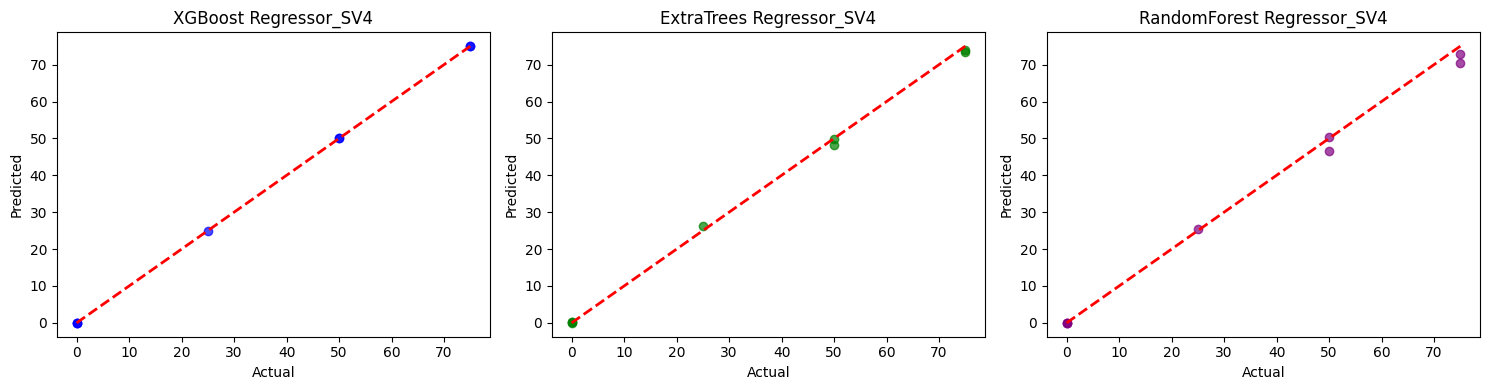

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preparazione del dataset ---
X = df_fault_sv4[selected_features_sv4]

# Suddivisione in training (80%) e test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 1. Gradient Boosting (XGBoost) ---
import xgboost as xgb
xgb_reg_sv4 = xgb.XGBRegressor(random_state=42)
xgb_reg_sv4.fit(X_train, y_train)
y_pred_xgb = xgb_reg_sv4.predict(X_test)

# --- 2. ExtraTreesRegressor ---
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
et_reg_sv4 = ExtraTreesRegressor(random_state=42)
et_reg_sv4.fit(X_train, y_train)
y_pred_et = et_reg_sv4.predict(X_test)

# --- 3. RandomForestRegressor (al posto dell'SVR) ---
rf_reg_sv4 = RandomForestRegressor(random_state=42)
rf_reg_sv4.fit(X_train, y_train)
y_pred_rf = rf_reg_sv4.predict(X_test)

# --- Funzione per stampare le metriche di regressione ---
def print_regression_metrics(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R^2 Score:", r2)
    print("")

print_regression_metrics(y_test, y_pred_xgb, "XGBoost Regressor_SV4")
print_regression_metrics(y_test, y_pred_et, "ExtraTrees Regressor_SV4")
print_regression_metrics(y_test, y_pred_rf, "RandomForest Regressor_SV4")

# --- Visualizzazione dei risultati ---
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("XGBoost Regressor_SV4")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,3,2)
plt.scatter(y_test, y_pred_et, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("ExtraTrees Regressor_SV4")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1,3,3)
plt.scatter(y_test, y_pred_rf, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("RandomForest Regressor_SV4")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

## **3 Previsioni sui dati di test non etichettati** (e confronto finale con il ground truth)

Importo il dataframe con i dati di test non etichettati

In [19]:
path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "test_data_split_with_condition_and_anomaly_fault_location.pkl")
test_data_aggregated_split= pd.read_pickle(file_path)

test_data_aggregated_split.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '..\\dataset\\dataframes\\test_data_split_with_condition_and_anomaly_fault_location.pkl'

Filtriamo solo i Fault

In [ ]:
df_fault = test_data_aggregated_split[test_data_aggregated_split['Condition'] == 3].copy()

Facciamo predizioni scegliendo quale dei 4 regressori usare in base al tipo di fault

In [ ]:
# Funzione per predire il valore di apertura (valve_opening) in base alla fault_location
def predict_valve_opening(row):
    fault_loc = row['fault_location']
    if fault_loc == 1:
        features = row[selected_features_sv1].to_frame().T  
        pred = et_reg_sv1.predict(features)
    elif fault_loc == 2:
        features = row[selected_features_sv2].to_frame().T
        pred = et_reg_sv2.predict(features)
    elif fault_loc == 3:
        features = row[selected_features_sv3].to_frame().T
        pred = et_reg_sv3.predict(features)
    elif fault_loc == 4:
        features = row[selected_features_sv4].to_frame().T
        pred = xgb_reg_sv4.predict(features)
    else:
        pred = np.array([np.nan])
    return pred[0]

# Assicurati di operare su una copia per evitare SettingWithCopyWarning
df_filtered = df_fault.copy()

# Applica la funzione a ciascuna riga per ottenere la predizione per quella riga
df_filtered['regression_pred'] = df_filtered.apply(predict_valve_opening, axis=1)
df_filtered.head(10)


NameError: name 'df_fault' is not defined

Importiamo `answer_competition.csv` e confrontiamo i valori predetti (`Predicted`) con quelli effettivi (`Expected`)

In [ ]:
# Ora, per ogni Case (che compare 3 volte), calcola la media delle predizioni e arrotonda il risultato a intero
df_case_reg_pred = df_filtered.groupby("Case")["regression_pred"].mean().reset_index()
df_case_reg_pred['regression_pred'] = df_case_reg_pred['regression_pred'].round().astype(int)

# Mantieni solo le colonne "Case" e "Predicted"
df_case_reg_pred = df_case_reg_pred[['Case', 'regression_pred']]

# Carica il file answer_competition.csv
df_answer = pd.read_csv("../dataset/test/answer_competition.csv")  # Assicurati che il percorso sia corretto

# Supponiamo che df_answer contenga la colonna "ID" che corrisponde a "Case" e la colonna "task5" con il ground truth.
# Unisci df_case con df_answer basandoti su "Case" e "ID"
df_joined = pd.merge(df_case_reg_pred, df_answer[['ID', 'task5']], left_on="Case", right_on="ID", how="left")

# Se non ti serve la colonna "ID", eliminala
df_joined.drop(columns=['ID'], inplace=True)

# Rinomina la colonna "task5" in "Expected" (o come preferisci)
df_joined.rename(columns={'regression_pred': 'Predicted', 'task5': 'Expected'}, inplace=True)

df_joined

# 179 -> SV2
# 181 -> SV4
# 188 -> SV1
# 190 -> SV3
# 202 -> SV3
# 212 -> SV2
# 214 -> SV4

,Case,Predicted,Expected
0,179,26,22
1,181,75,76
2,188,24,5
3,190,49,46
4,202,55,44
5,212,63,70
6,214,64,24


Metriche di valutazione sui dati di test

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(df_joined["Expected"], df_joined["Predicted"])
mse = mean_squared_error(df_joined["Expected"], df_joined["Predicted"])
rmse = np.sqrt(mse)
r2 = r2_score(df_joined["Expected"], df_joined["Predicted"])
print("Metriche di valutazioni sui dati di test:")
print(f"Mean Absolute Error (MAE): {mae:.1f}")
print(f"Mean Squared Error (MSE): {mse:.1f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.1f}")
print(f"R^2 Score: {r2:.1f}")

Metriche di valutazioni sui dati di test:
Mean Absolute Error (MAE): 11.7
Mean Squared Error (MSE): 194.0
Root Mean Squared Error (RMSE): 13.9
R^2 Score: 0.7


## **4. Aggiunta della colonna `valve_opening` al test set** (con le predizioni complessive del Task 5)

In [ ]:
# Merge (left join) basato sulla colonna "Case"
df_merged = pd.merge(test_data_aggregated_split, 
                     df_joined[['Case', 'Predicted']], 
                     on="Case", 
                     how="left")

df_merged.rename(columns={'Predicted': 'valve_opening'}, inplace=True)

# Sostituisci i valori mancanti (NaN) in "valve_fault" con 100
df_merged['valve_opening'] = df_merged['valve_opening'].fillna(100)

# Se necessario, converti in intero
df_merged['valve_opening'] = df_merged['valve_opening'].astype(int)


Esportazione finale

In [ ]:
df_final = df_merged[['Case', 'Condition', 'anomaly_location', 'fault_location', 'valve_opening']].copy()

# Aggrega per "Case": per ogni case prendi il primo valore (dato che per lo stesso case dovrebbero essere identici)
df_final_agg = df_final.groupby('Case', as_index=False).first()

# Esporta il DataFrame finale in CSV e Pickle
df_final_agg.to_csv("../dataset/outputs/final_test_data_predictions.csv", index=False)
df_final_agg.to_pickle("../dataset/outputs/final_test_data_predictions.pkl")

df_final_agg


,Case,Condition,anomaly_location,fault_location,valve_opening
0,178,2,2,0,100
1,179,3,0,2,26
2,180,0,0,0,100
3,181,3,0,4,67
4,182,0,0,0,100
5,183,0,0,0,100
6,184,1,0,0,100
7,185,0,0,0,100
8,186,2,6,0,100
9,187,0,0,0,100
